In [96]:
import pandas as pd
from scipy.stats import ttest_ind, levene
import matplotlib.pyplot as plt

## Обработка данных


In [97]:
data = pd.read_csv("М.Тех_Данные_к_ТЗ_DS.csv")
data.columns = ["sick_days", "age", "gender"]
data.head()

,sick_days,age,gender
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


## Подготовка датасетов к гипотезам
   Датасеты к первой гипотезе

In [98]:
mens = data[(data["gender"] == "М") & (data["sick_days"] > 2)]
women = data[(data["gender"] == "Ж") & (data["sick_days"] > 2)]

Построим графики по первой гипотезе

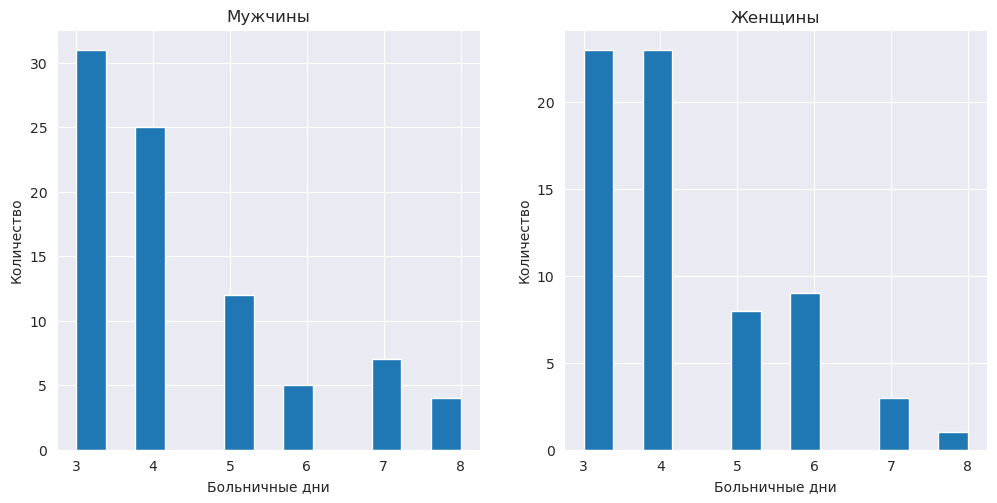

In [99]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.hist(mens['sick_days'], bins=13)
plt.title('Мужчины')
plt.xlabel("Больничные дни")
plt.ylabel("Количество")

plt.subplot(2,2, 2)
plt.hist(women['sick_days'], bins=13)
plt.title('Женщины')
plt.xlabel("Больничные дни")
plt.ylabel("Количество")

plt.show()

Датасеты ко второй гипотезе

In [100]:
older = data[(data['age'] > 35) & (data['sick_days'] > 2)]
younger = data[(data['age'] <= 35) & (data['sick_days'] > 2)]

Построим графики по второй гипотезе

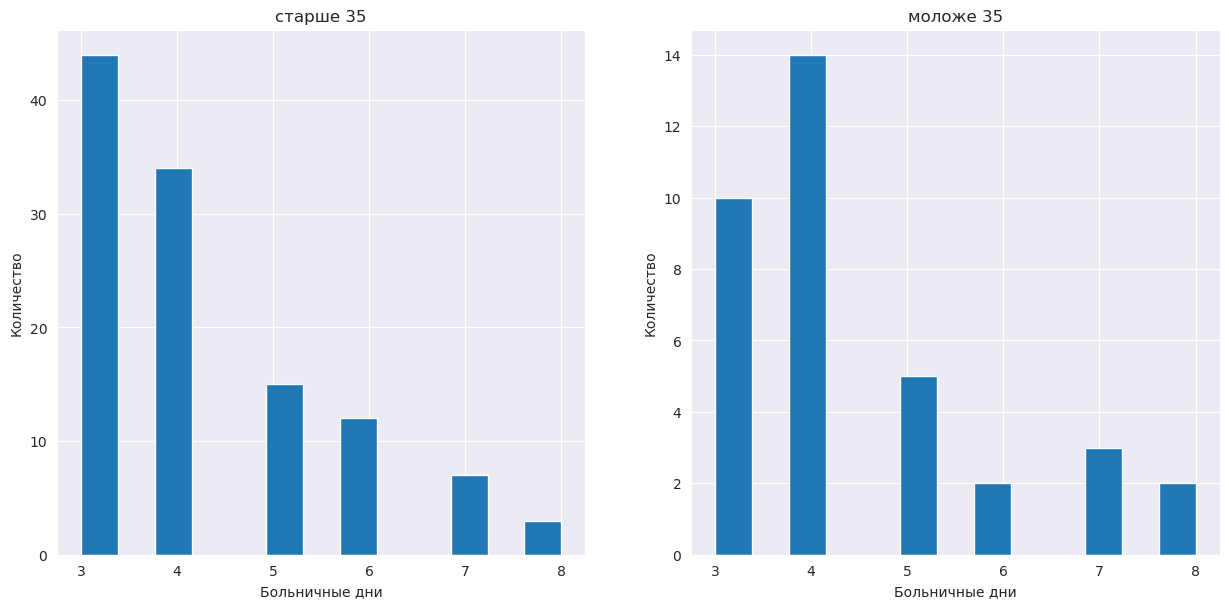

In [101]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.hist(older['sick_days'], bins=13)
plt.title('старше 35')
plt.xlabel("Больничные дни")
plt.ylabel("Количество")

plt.subplot(2,2, 2)
plt.hist(younger['sick_days'], bins=13)
plt.title('моложе 35')
plt.xlabel("Больничные дни")
plt.ylabel("Количество")

plt.show()

## Гипотеза №1
Проверим равенство дисперсий, а затем проведем t-тест для независимых выборок
Предположим, что гипотеза H0 - Мужчины пропускают в течение года более 2 рабочих дней по болезни столько же сколько и женщины.
H1 - кол-во пропусков у мужчин значительно больше, чем у женщин.
Воспользуемся t-тестом для независимых выборок и если p-value < 0.05, то гипотезу H0 отвергаем.


In [102]:
statistic, p_value_levene = levene(mens['sick_days'], women['sick_days'])

if p_value_levene > 0.05:
    # Равенство дисперсий не отвергается, можно использовать equal_var=True
    t_statistic, p_value_ttest = ttest_ind(mens['sick_days'], women['sick_days'])
    
else:
    # Равенство дисперсий отвергается, использовать equal_var=False
    t_statistic, p_value_ttest = ttest_ind(mens['sick_days'], women['sick_days'], equal_var=False)

# Вывод результатов
print(f"t-статистика: {round(t_statistic, 4)}")
print(f"p-значение: {round(p_value_ttest, 4)}")
print("Гипотеза отвергается" if p_value_ttest < 0.05 else "Гипотеза не отвергается")

t-статистика: 0.4159
p-значение: 0.6781
Гипотеза не отвергается


Гипотезу мы не отвергаем, а значит мужчины пропускают в течение года более 2 рабочих дней по
болезни столько же сколько и женщины.

## Гипотеза №2
Проверим равенство дисперсий, а затем проведем t-тест для независимых выборок 
Все аналогично первой гипотезе

In [103]:
statistic, p_value_levene = levene(older['sick_days'], younger['sick_days'])

if p_value_levene > 0.05:
    # Равенство дисперсий не отвергается, можно использовать equal_var=True
    t_statistic, p_value_ttest = ttest_ind(older['sick_days'], younger['sick_days'])
else:
    # Равенство дисперсий отвергается, использовать equal_var=False
    t_statistic, p_value_ttest = ttest_ind(older['sick_days'], younger['sick_days'], equal_var=False)

# Вывод результатов
print(f"t-статистика: {round(t_statistic, 4)}")
print(f"p-значение: {round(p_value_ttest, 4)}")
print("Гипотеза отвергается" if p_value_ttest < 0.05 else "Гипотеза не отвергается")

t-статистика: -0.7594
p-значение: 0.4488
Гипотеза не отвергается


Гипотезу мы не отвергаем, а значит работники старше 35 лет пропускают в течение года более 2 рабочих
дней по болезни столько же сколько и более молодые коллеги.